In [1]:
import zipfile
import os

with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("face_mask_dataset")


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "face_mask_dataset"


datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 7186 images belonging to 1 classes.
Found 1796 images belonging to 1 classes.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "face_mask_dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 7186 images belonging to 1 classes.
Found 1796 images belonging to 1 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\anurag arya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,333,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,353,217 (16.61 MB)

 Trainable params: 4,353,217 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10


C:\Users\anurag arya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 176s 753ms/step - accuracy: 1.0000 - loss: 0.0155 - val_accuracy: 1.0000 - val_loss: 1.8166e-16
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 115s 508ms/step - accuracy: 1.0000 - loss: 2.8617e-08 - val_accuracy: 1.0000 - val_loss: 3.1714e-16
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 95s 418ms/step - accuracy: 1.0000 - loss: 3.3089e-09 - val_accuracy: 1.0000 - val_loss: 1.3028e-17
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 130s 576ms/step - accuracy: 1.0000 - loss: 3.0987e-09 - val_accuracy: 1.0000 - val_loss: 9.8142e-17
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 86s 377ms/step - accuracy: 1.0000 - loss: 2.3495e-09 - val_accuracy: 1.0000 - val_loss: 1.1897e-17
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 114s 507ms/step - accuracy: 1.0000 - loss: 7.3205e-10 - val_accuracy: 1.0000 - val_loss: 7.1722e-17
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 111s 492ms/step - accuracy: 1.0000 - loss: 2.0283e-09 - val_accuracy: 1.0000 - val_loss: 7.9520e-18
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━

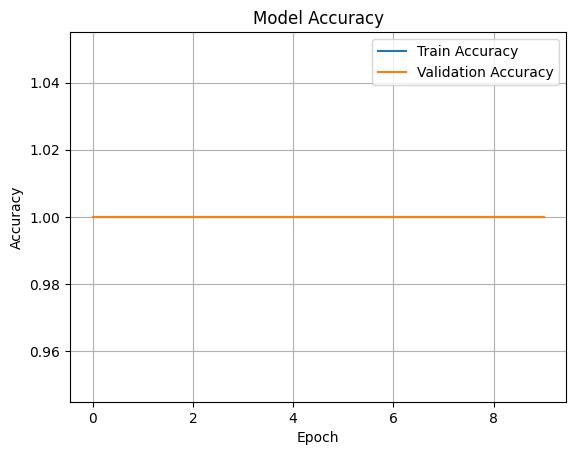

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
model.save("face_mask_cnn_model.keras")
